In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [ ]:
# this particle has 3/4 charges
# Done at ~0.75 mbar

In [104]:
# take in thermal data and get damping central frequency etc.

filename = 'D:\\Experiment\\Calibration\\20231108\\Thermal.mat'

data = sio.loadmat(filename)
z = np.transpose(data['B'])[0]
PSDz = scisig.welch(z, nperseg = 10**6, fs = 10**6)

In [105]:
lb = 10000
ub = 80000

def Linewidth(f, A, f0, y, c):
    return A/((f**2-f0**2)**2 + f**2*y**2)+c

fit, cov = opt.curve_fit(Linewidth, PSDz[0][lb:ub], PSDz[1][lb:ub], p0 = [10**(10), 42000, 1000, 10**(-9)])
print(fit)
fitted = Linewidth(PSDz[0], fit[0], fit[1], fit[2], 0.5*10**(-9))

[ 1.68587573e+09  4.23504786e+04  4.83373332e+02 -8.74002042e-10]


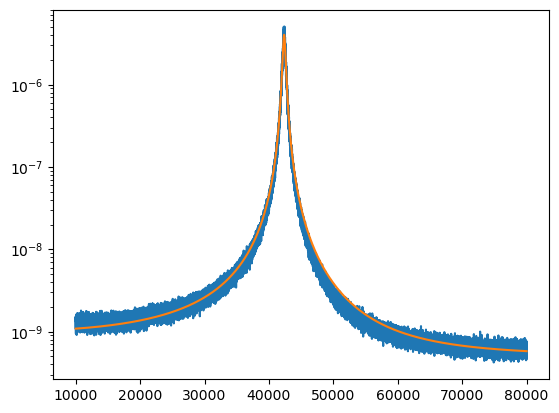

In [106]:
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.plot(PSDz[0][lb:ub], fitted[lb:ub])
plt.yscale('log')

In [107]:
def Line(x, a, b):
    return a*x + b
areal = []
step = np.linspace(0, ub-lb-1, ub-lb-1)
for i in range(1, ub - lb):
    area = np.trapz(PSDz[1][lb:lb+i], PSDz[0][lb:lb+i]) 
    areal.append(area)

fit1, cov1 = opt.curve_fit(Line, step[:100], areal[:100])
fit2, cov2 = opt.curve_fit(Line, step[-100:], areal[-100:])

fitted1 = Line(step, *fit1)
fitted2 = Line(step, *fit2)



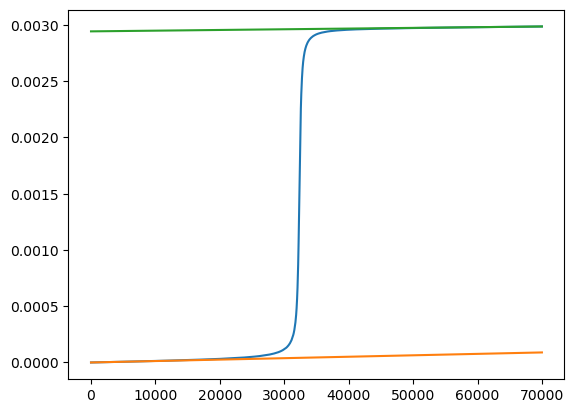

In [108]:
plt.plot(step, areal)
plt.plot(step, fitted1)
plt.plot(step, fitted2)

In [109]:
area = fitted2[32000]-fitted1[32000]
print(area)

# This is area under curve in V^2

0.0029219155707203466


In [52]:
# Now let's open up the file where we had a frequency comb
# Find area under each comb then fit

In [53]:
filename = 'D:\\Experiment\\Calibration\\20231108\\Freq_comb.mat'

data = sio.loadmat(filename)
z = np.transpose(data['B'])[0]
PSDz = scisig.welch(z, nperseg = 10**6, fs = 10**6)

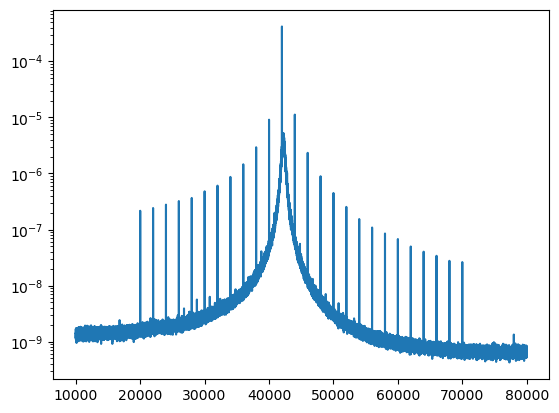

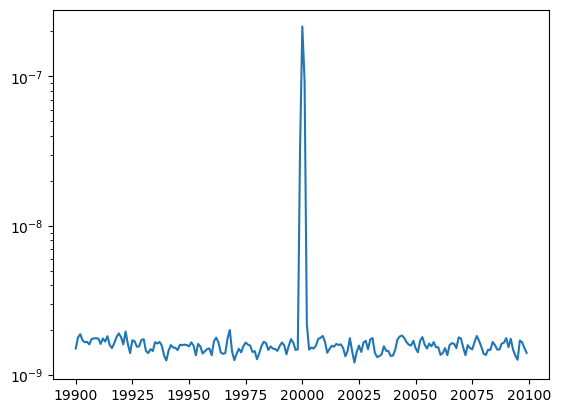

In [56]:
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.yscale('log')

lb2 = 19900
ub2 = 20100
plt.figure()
plt.plot(PSDz[0][lb2:ub2], PSDz[1][lb2:ub2])
plt.yscale('log')


In [70]:
areaV = []
for j in range(20000, 70001, 2000):
    areal = []
    step = np.linspace(0, 199, 199)
    for i in range(1, 200):
        area = np.trapz(PSDz[1][j-100:j-100+i], PSDz[0][j-100:j-100+i]) 
        areal.append(area)

    fit1, cov1 = opt.curve_fit(Line, step[:75], areal[:75])
    fit2, cov2 = opt.curve_fit(Line, step[-75:], areal[-75:])

    fitted1 = Line(step, *fit1)
    fitted2 = Line(step, *fit2)

    areaf = fitted2[100]-fitted1[100]
    areaV.append(areaf)

In [77]:
def E_resp(f, A, f0, y):
    return A/((f0**2-f**2)**2+y**2*f**2)

# A = E0**2*q**2/(2*m**2)*cal**2/(2*n.pi)**4 so can use this to calculate mass

freq = list(range(20000, 70001, 2000))
fitV, covV = opt.curve_fit(E_resp, freq, areaV, p0 = [10**10, 42000, 1000])
print(fitV)
freq2 = np.linspace(20000, 70000, 1000)
fittedV = E_resp(freq2, *fitV)

[ 5.21651797e+11  4.21676070e+04 -5.16706525e+02]


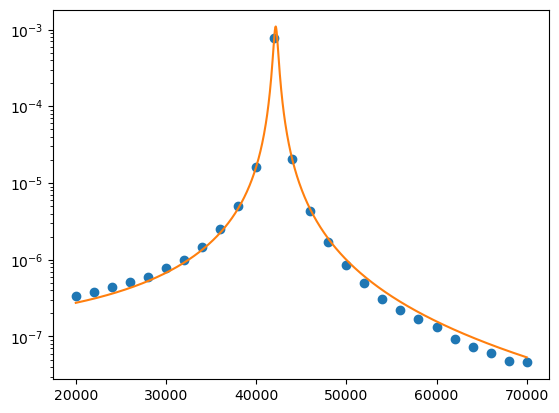

In [79]:
plt.plot(freq, areaV, 'o')
plt.plot(freq2, fittedV)
plt.yscale('log')

In [81]:
fit

array([ 1.68587573e+09,  4.23504786e+04,  4.83373332e+02, -8.74002042e-10])

In [82]:
fitV

array([ 5.21651797e+11,  4.21676070e+04, -5.16706525e+02])

In [129]:
# kb*T = mw0**2*area/cal**2
# fitV[0] = E0**2*q**2/(2*m**2)*cal**2/(2*np.pi**4)

# (2*np.pi)**4*fitV[0]/(E0**2*q**2)*2*m**2 = m*w0**2*area/kb/T
# m = w0**2*area*E0**2*q**2/kb/T/fitV[0]/2/(2*np.pi)**4

w0 = fit[1]*2*np.pi
kb = 1.38*10**(-23)
T = 293
q = 4*1.6*10**(-19)
E0 = 120*8.422/2/len(freq)*20
mass1 = 4/3*np.pi*(83*10**(-9))**3*2200

print(w0**2*area*E0**2*q**2/kb/T/fitV[0]/2/(2*np.pi)**4)
print(mass1)

1.947481673517217e-18
5.269210726613232e-18


In [130]:
mass1*w0**2*area/kb/T

269614289222.53088

In [131]:
print(fitV[0]/E0**2/q**2*(2*mass1**2)*(2*np.pi)**4)
print(mass1*w0**2*area/kb/T)

729482861963.8885
269614289222.53088


In [134]:
wdr = 2*np.pi*34000
y = fit[2]*2*np.pi
print(areaV[7]*((w0**2-wdr**2)**2+y**2*wdr**2)*2*mass1**2/E0**2/q**2)
print(fitV[0]/E0**2/q**2*(2*mass1**2)*(2*np.pi)**4)

835771456553.8671
729482861963.8885
